## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [3]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


In [4]:
#check to see if all columns are binary
unique_values =  [print(f'{col} unique values: {titanic[col].nunique()}') for col in titanic.columns]

Survived unique values: 2
SibSp unique values: 7
Parch unique values: 7
Pclass_1 unique values: 2
Pclass_2 unique values: 2
Pclass_3 unique values: 2
Sex_female unique values: 2
Sex_male unique values: 2
Embarked_C unique values: 2
Embarked_Q unique values: 2
Embarked_S unique values: 2


In [5]:
#check to make sure column is categorical
titanic['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [6]:
#check to make sure column is categorical
titanic['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Split the data into train and test with 20% of data in test.

In [7]:
from sklearn.model_selection import train_test_split

# define X and y
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# test/train split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [8]:
# build model function

def build_model(optimizer,model_name='Model',output_activation='sigmoid',metrics='accuracy',loss='binary_crossentropy',
                batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation='relu'))
  # second layer
  model.add(Dense(64 ,activation='relu'))
  # third layer
  model.add(Dense(32 ,activation='relu'))
  # fourth layer
  model.add(Dense(32 ,activation='relu'))
  # fifth layer/output layer with output activation
  model.add(Dense(1 ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history


def results(model,history,model_name='Model'):
  # dataframe with epoch history
  model_df = pd.DataFrame(history.history)
  # plot model loss over epochs
  model_df[['loss', 'val_loss']].plot(figsize=(20,10))
  plt.title(f'{model_name} Loss'.capitalize() )
  plt.show()
  # plot model accuracy over epochs
  model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
  plt.title(f'{model_name} Accuracy'.capitalize() )
  plt.show()  
  # final epoch model results
  results = model.evaluate(X_test, y_test, verbose=0)
  print(f'{model_name} Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Accuracy: '.capitalize() , round(results[1],6))


Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`. Compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

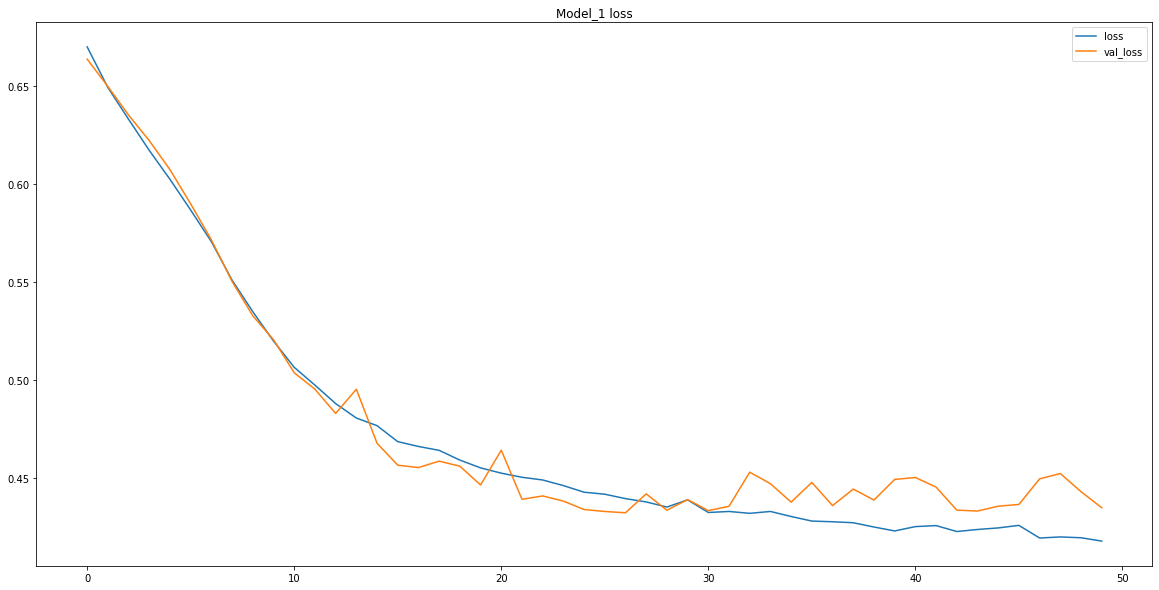

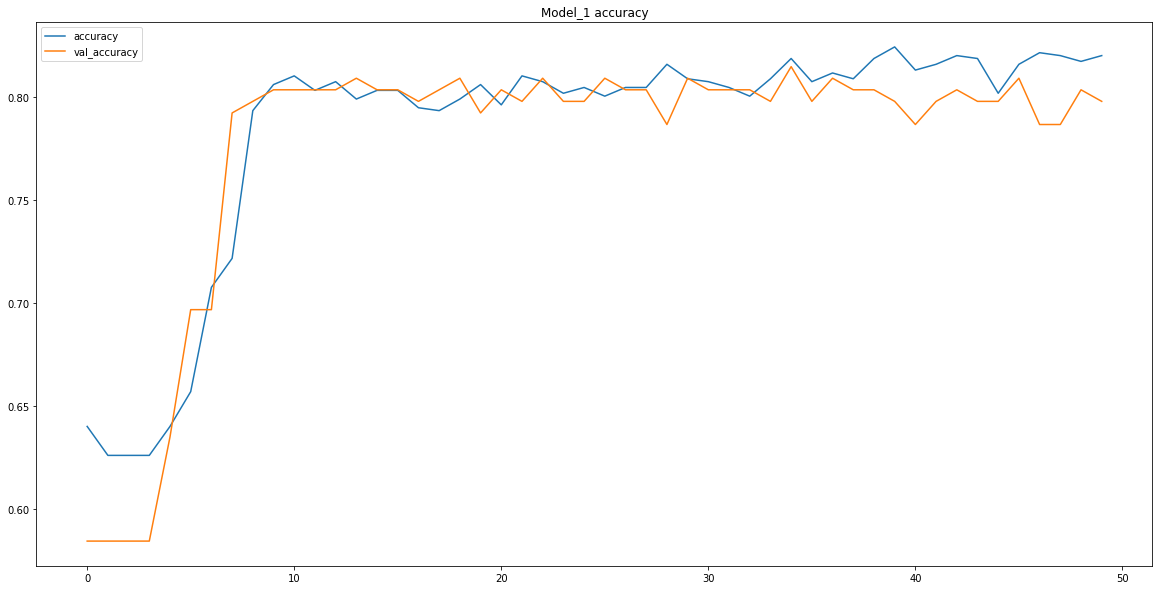

Model_1 loss:  0.434696
Model_1 accuracy:  0.797753


In [9]:
# build sgd model with lr = .05
model_1, model_history_1 = build_model(optimizer=SGD,learning_rate=.05,batch_size=100,epochs=50)

results_1 = results(model_1, model_history_1,model_name='model_1')


Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

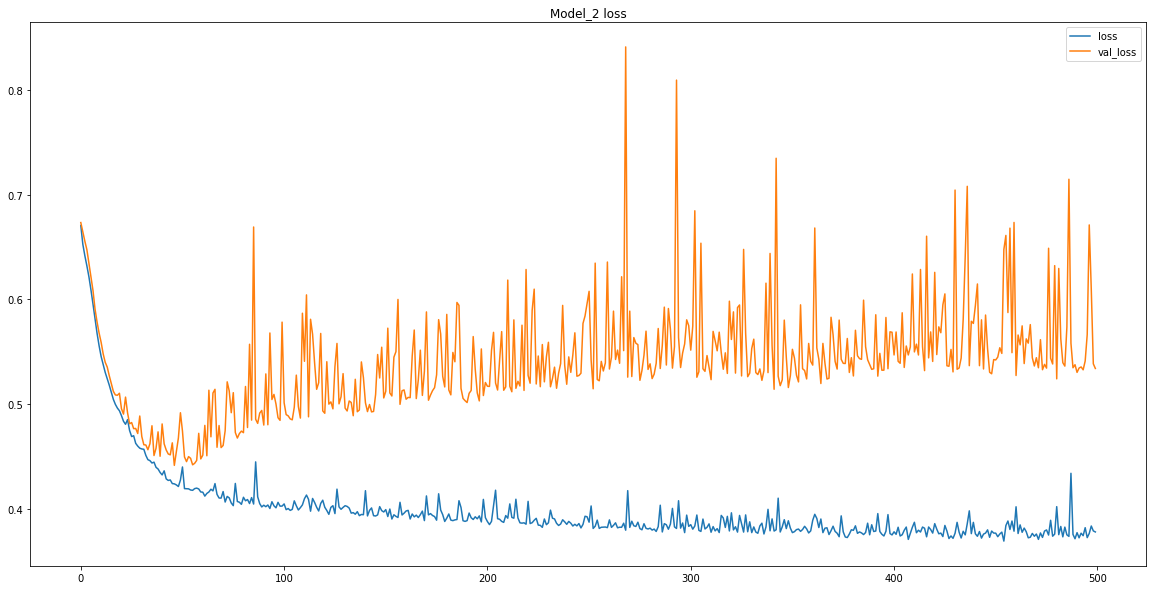

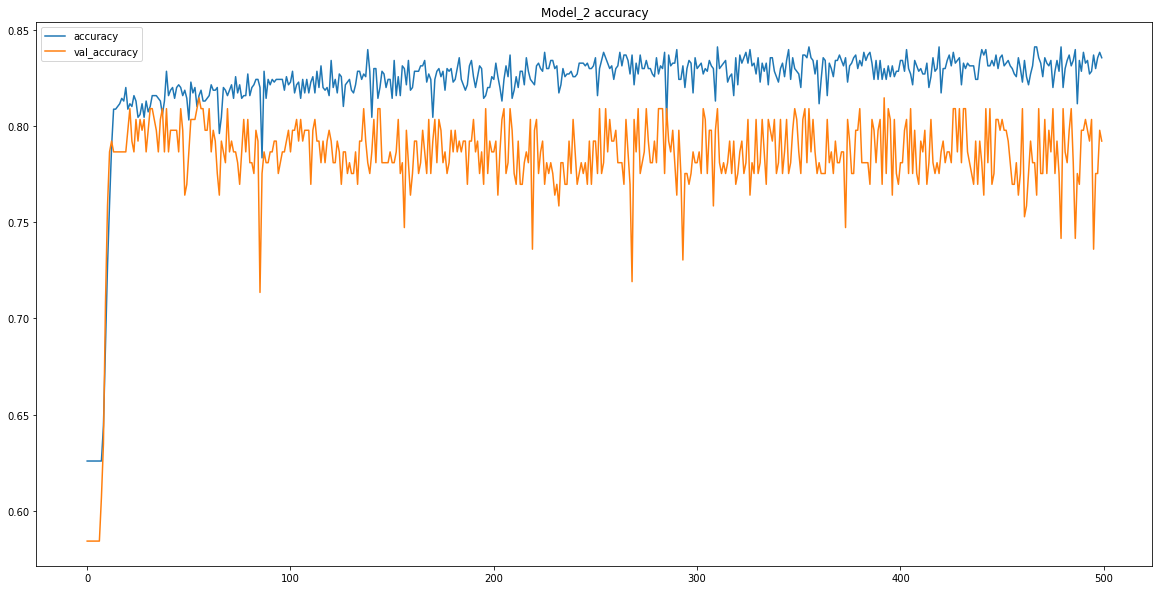

Model_2 loss:  0.533946
Model_2 accuracy:  0.792135


In [10]:
# model with 500 epochs
model_2, model_history_2 = build_model(optimizer=SGD,learning_rate=.05,batch_size=100,epochs=500)

results_2 = results(model_2, model_history_2,model_name='model_2')

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

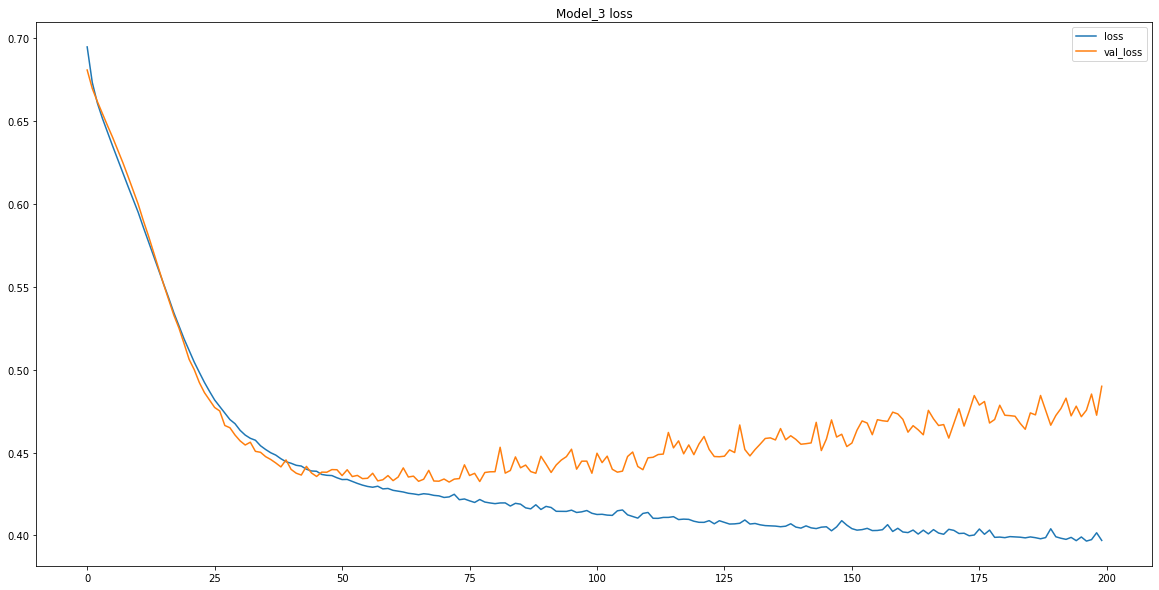

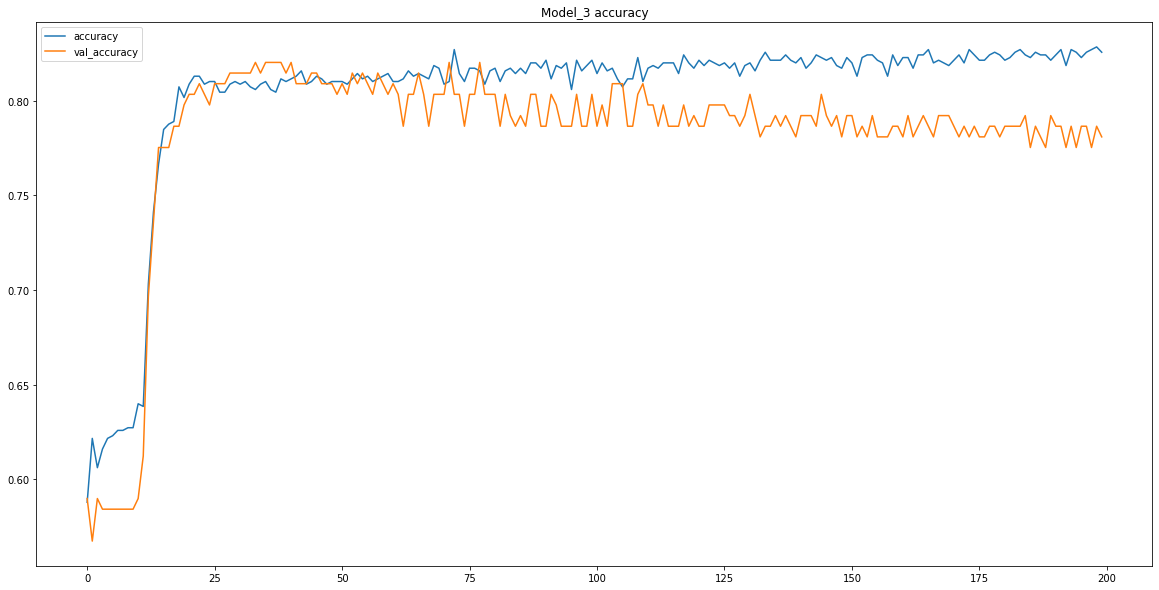

Model_3 loss:  0.489919
Model_3 accuracy:  0.780899


In [11]:
# model with batch size = 200 and epochs = 200
model_3, model_history_3 = build_model(optimizer=SGD,learning_rate=.05,batch_size=200,epochs=200)

results_3 = results(model_3, model_history_3, model_name='model_3')

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [12]:
# build 7 layer model function

def seven_layers_model(model_name='Model',output_activation='sigmoid',metrics='accuracy',loss='binary_crossentropy',
                optimizer=SGD,batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation='relu'))
  # second layer
  model.add(Dense(128 ,activation='relu'))
  # third layer
  model.add(Dense(64 ,activation='relu'))
  # fourth layer
  model.add(Dense(64 ,activation='relu'))
  # fifth layer
  model.add(Dense(32 ,activation='relu'))
  # sixth layer
  model.add(Dense(32 ,activation='relu'))
  # seventh layer/output layer with output activation
  model.add(Dense(1 ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model,history


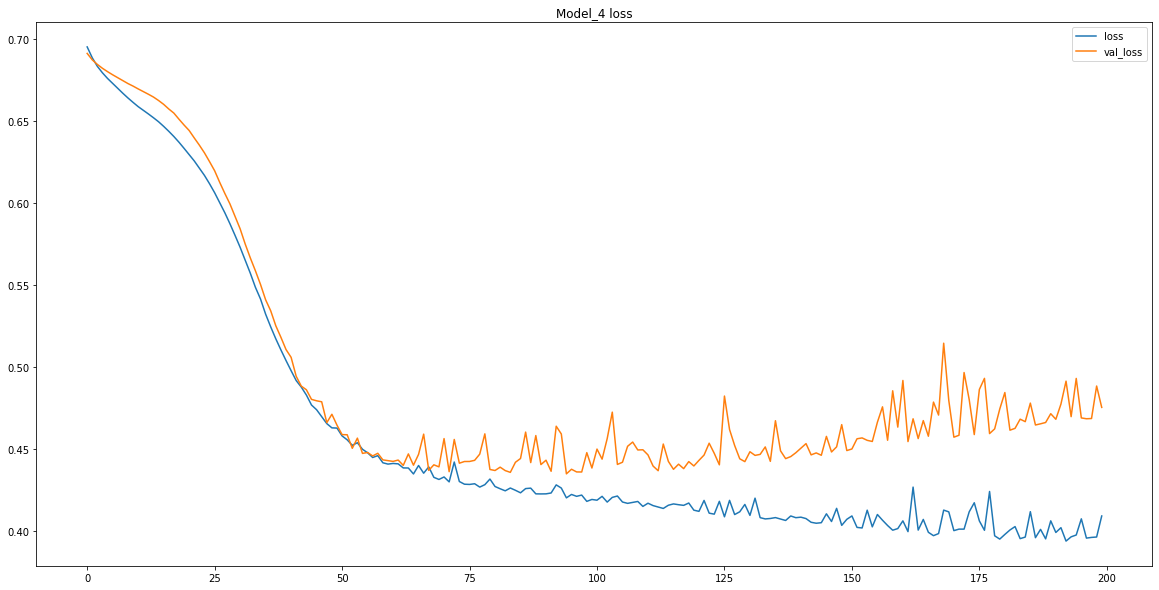

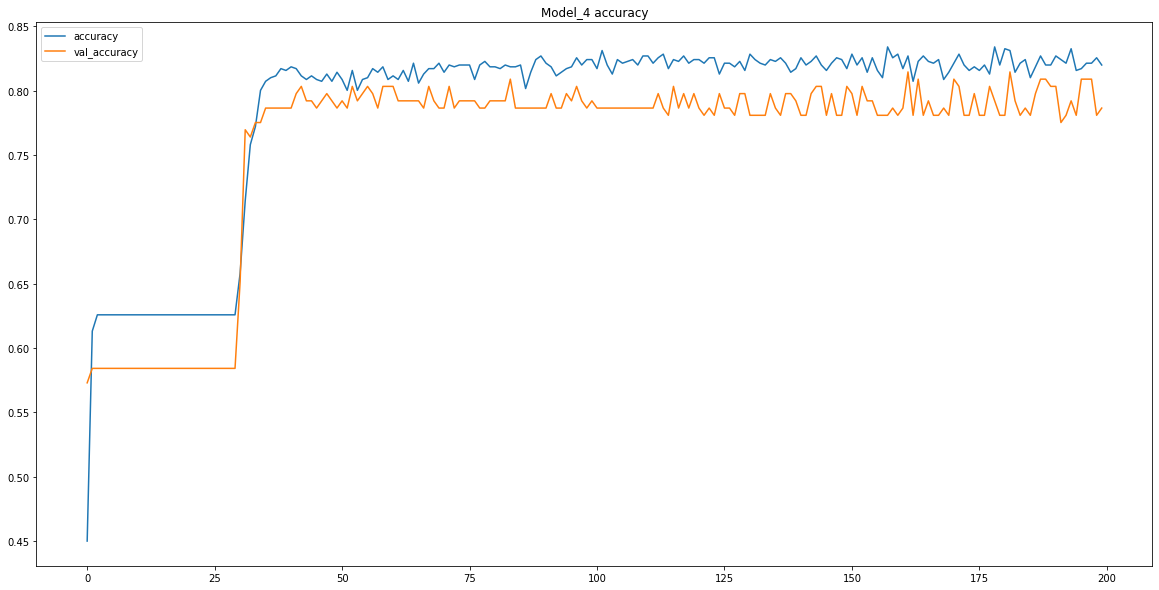

Model_4 loss:  0.475374
Model_4 accuracy:  0.786517


In [13]:
# 7 layer model 
model_4, model_history_4 = seven_layers_model(optimizer=SGD,learning_rate=.05,batch_size=200,epochs=200)

results_4 = results(model_4, model_history_4, model_name='model_4')

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

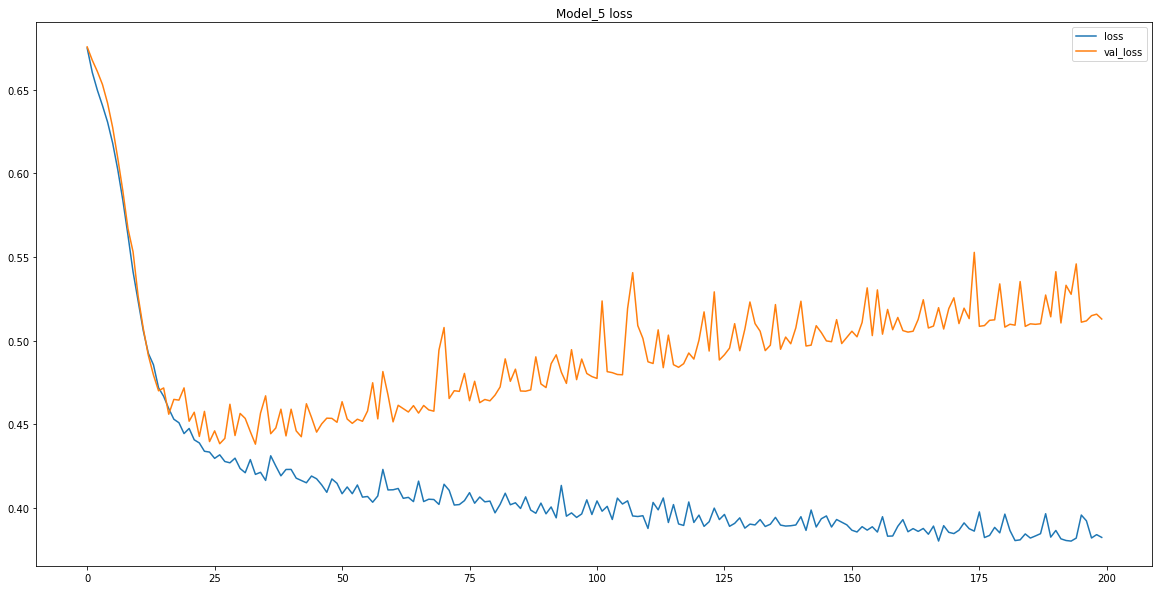

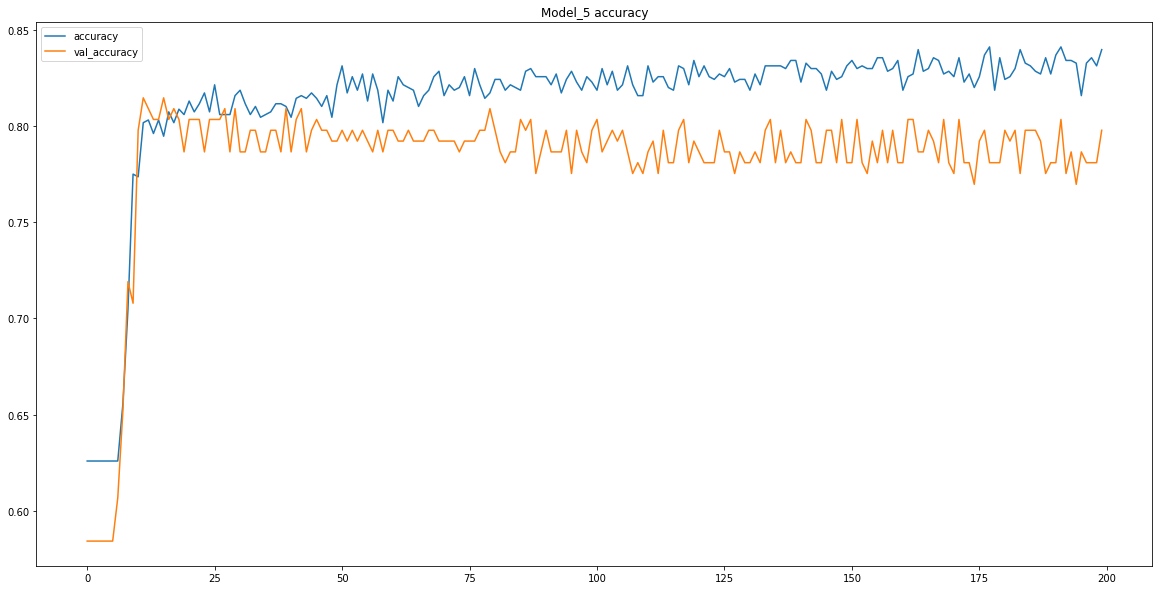

Model_5 loss:  0.512967
Model_5 accuracy:  0.797753


In [14]:
# 7 layer model with batch size = 80 and epochs = 200
model_5, model_history_5 = seven_layers_model(optimizer=SGD,learning_rate=.05,batch_size=80,epochs=200)

results_5 = results(model_5, model_history_5, model_name='model_5')


Define a new SGD optimizer with a learning rate of 0.001. Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. 

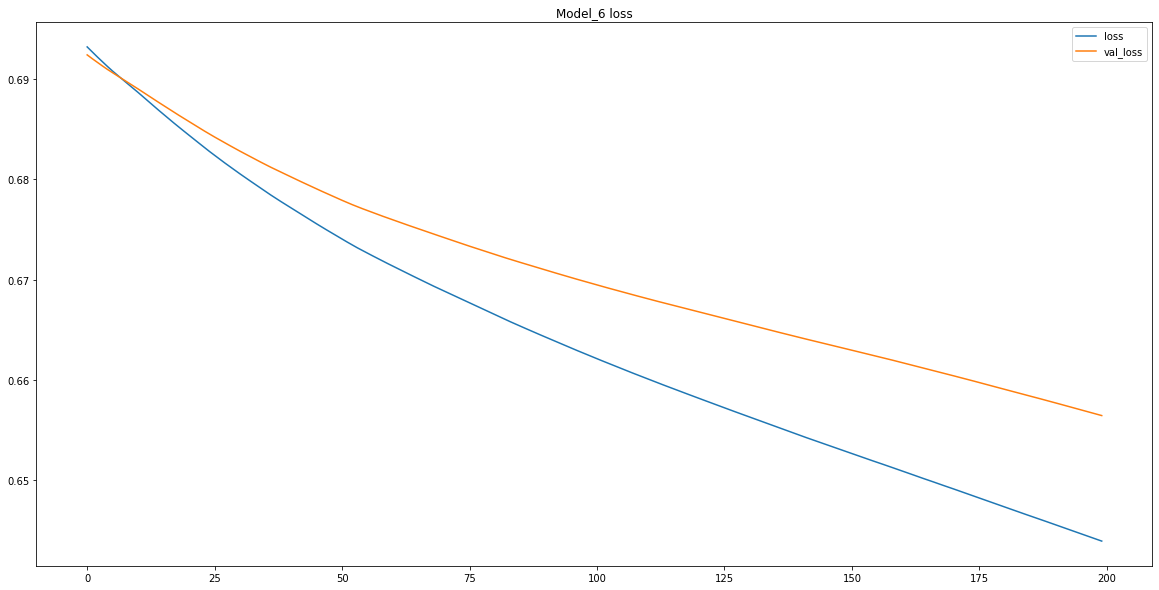

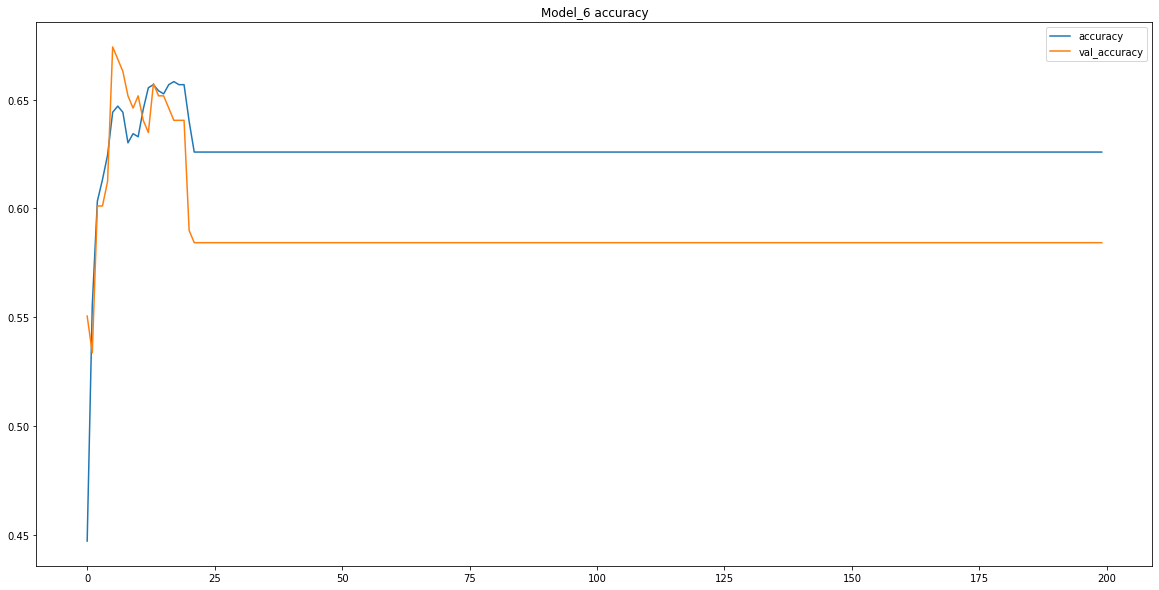

Model_6 loss:  0.656434
Model_6 accuracy:  0.58427


In [15]:
# 7 layer model with batch size = 80, epochs = 200, and lr = .001
model_6, model_history_6 = seven_layers_model(optimizer=SGD,learning_rate=.001,batch_size=80,epochs=200)

results_6 = results(model_6, model_history_6, model_name='model_6')

#### Compare to previous results. What do you think went wrong and why?

The model is taking too few steps for the number of epochs we gave it to converge on the optimal accuracy for the dataset. In short the model is taking baby steps and has not reached the bottom of the hill yet. We need to give it much more epochs in order to reach convergence of the actual accuracy for the dataset. 

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [16]:
#plot confustion matric helper function
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [17]:
# get y test preds for model_6
y_test_pred = pd.Series(model_6.predict(X_test).flatten() > 0.5) *1
y_test_pred

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64

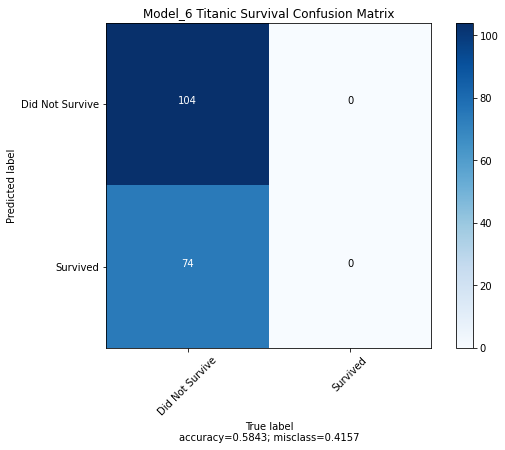

In [18]:
from sklearn.metrics import  classification_report, confusion_matrix

# plot model_6 confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Did Not Survive','Survived'],title = 'Model_6 Titanic Survival Confusion Matrix',normalize=False)


In [19]:
# model_6 classifcation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       104
           1       0.00      0.00      0.00        74

    accuracy                           0.58       178
   macro avg       0.29      0.50      0.37       178
weighted avg       0.34      0.58      0.43       178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


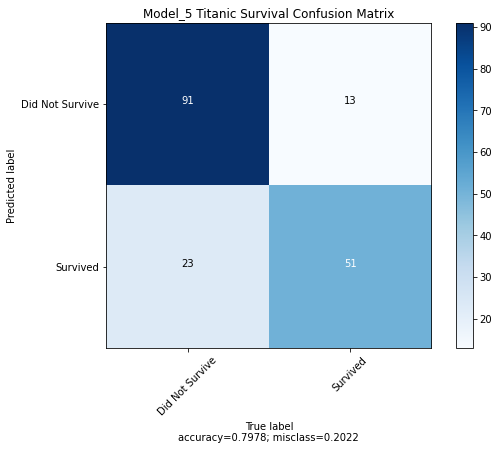

In [20]:
# get y test preds for model_5
y_test_pred = pd.Series(model_5.predict(X_test).flatten() > 0.5) *1
y_test_pred

# plot model_5 confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Did Not Survive','Survived'],title = 'Model_5 Titanic Survival Confusion Matrix',normalize=False)


In [21]:
# model_5 classifcation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       104
           1       0.80      0.69      0.74        74

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

